In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import nltk
import unicodedata
import re

import env
import acquire
import prepare

from wordcloud import WordCloud

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')

# Exercise 1

Spam Data

## Exercise 1a

Load the spam data set.

In [3]:
# read in spam data

df = pd.read_csv('spam_clean - spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exercise 1b

Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [4]:
# create function to clean data
def clean(text):
    '''
    This function takes in a string and converts all characters to lowercase, normalizes them, removes special
    characters, and returns a string
    '''
    # convert to lowercase
    text = text.lower()
    # normalize
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # return anything that is a letter, number, single quote, or white space
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
# clean and create a single string of all messages by label
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [6]:
# split spam words and get top 50 bigrams
top50_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
                      .value_counts()
                       .head(50))

top50_spam_bigrams

(you, have)            73
(have, won)            54
(your, mobile)         49
(to, claim)            46
(please, call)         44
(won, a)               40
(this, is)             40
(to, contact)          37
(you, are)             35
(stop, to)             28
(u, have)              27
(cash, or)             27
(a, a2000)             25
(or, a)                25
(will, be)             25
(po, box)              24
(contact, u)           24
(a1000, cash)          23
(to, receive)          23
(guaranteed, call)     23
(for, your)            22
(prize, guaranteed)    22
(with, a)              22
(win, a)               21
(have, a)              21
(a, new)               21
(selected, to)         20
(urgent, your)         20
(contact, you)         20
(attempt, to)          19
(send, stop)           19
(holiday, or)          19
(to, 86688)            19
(every, week)          19
(await, collection)    19
(go, to)               19
(to, 8007)             19
(out, who)             18
(land, line)

In [7]:
# split ham words and get top 50 bigrams
top50_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts()
                       .head(50))

top50_ham_bigrams

(are, you)     173
(i, am)        132
(have, a)      110
(i, will)       98
(you, are)      91
(do, you)       91
(in, the)       86
(if, you)       83
(i, have)       83
(i, dont)       82
(want, to)      79
(going, to)     76
(i, was)        74
(in, a)         73
(i, can)        71
(and, i)        71
(have, to)      70
(but, i)        70
(to, be)        66
(to, get)       65
(i, cant)       63
(on, the)       61
(need, to)      60
(will, be)      58
(if, u)         57
(i, think)      56
(call, me)      56
(i, need)       55
(for, the)      55
(i, want)       54
(you, know)     53
(i, love)       50
(to, do)        50
(a, great)      49
(so, i)         49
(you, want)     49
(when, i)       49
(i, got)        48
(to, go)        47
(ill, call)     47
(to, you)       47
(can, you)      47
(you, have)     45
(i, know)       44
(you, can)      44
(if, i)         44
(see, you)      43
(to, come)      43
(you, in)       43
(ok, i)         42
dtype: int64

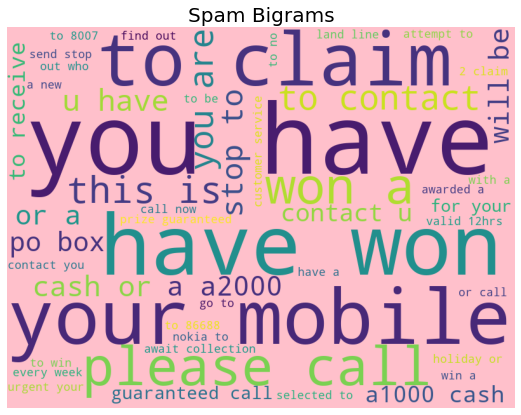

In [8]:
# create wordcloud of top 50 spam bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top50_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='pink', width=800, height=600).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')
plt.title('Spam Bigrams',size=20)
plt.show()

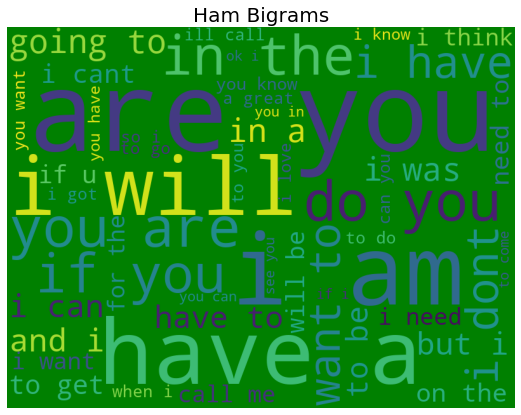

In [9]:
# create wordcloud of top 50 ham bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top50_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='green', width=800, height=600).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')
plt.title('Ham Bigrams',size=20)
plt.show()

### Takeaways

* Spam messages are all about 'you' and 'your'
* Spam messages contain a lot of words with positive connotations (win, won, claim, prize, cash, etc.)
* Ham messages are all about 'you' and 'I'
* Ham messages are more neutral and contain more filler words

## Exercise 1c

Is there any overlap in the bigrams for the spam data and the ham data?

In [10]:
# use sets to find the intersection of spam and hap
overlap = set.intersection(set(top50_spam_bigrams.keys()), set(top50_ham_bigrams.keys()))
overlap

{('have', 'a'), ('to', 'be'), ('will', 'be'), ('you', 'are'), ('you', 'have')}

### There is a little overlap in the bigrams for these two message types and it makes sense that two of these contain the word 'you' and also that two contain the word 'have'

## Exercise 1d

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [11]:
# split spam words and get top 20 trigrams
top20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words.split(), 3))
                      .value_counts()
                       .head(20))

top20_spam_trigrams

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(to, contact, u)             18
(urgent, your, mobile)       18
(to, contact, you)           16
(account, statement, for)    16
(valid, 12hrs, only)         16
(from, land, line)           16
(this, is, the)              15
(is, the, 2nd)               15
(cash, or, a)                15
(trying, to, contact)        15
(shows, that, you)           14
(draw, shows, that)          14
(2nd, attempt, to)           14
(reply, or, call)            14
(land, line, claim)          14
(we, are, trying)            14
dtype: int64

In [12]:
# split ham words and get top 20 trigrams
top20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words.split(), 3))
                      .value_counts()
                       .head(20))

top20_ham_trigrams

(ill, call, later)    39
(sorry, ill, call)    38
(how, are, you)       35
(i, want, to)         29
(let, me, know)       26
(have, a, great)      25
(i, miss, you)        24
(i, love, you)        23
(hope, you, are)      20
(i, have, to)         20
(i, dont, know)       19
(give, me, a)         19
(happy, new, year)    18
(do, have, a)         17
(a, great, day)       17
(on, the, way)        16
(i, am, in)           16
(u, wan, 2)           16
(where, are, you)     16
(are, you, doing)     16
dtype: int64

Text(0.5, 1.0, 'Top Spam Trigrams')

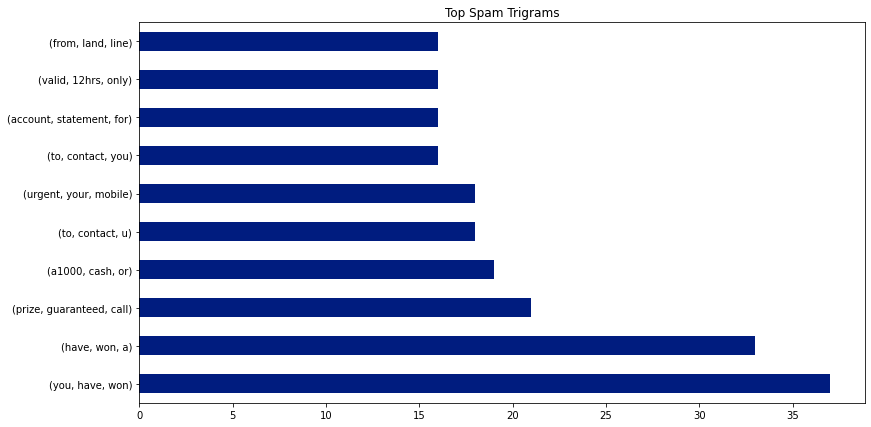

In [13]:
# plot only the top 10 spam trigrams
top20_spam_trigrams.head(10).plot.barh()
plt.title('Top Spam Trigrams')

Text(0.5, 1.0, 'Top Ham Trigrams')

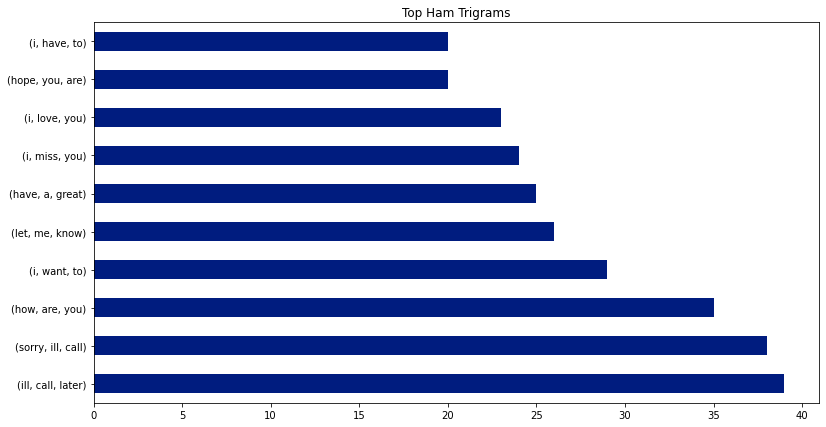

In [14]:
# plot only the top 10 ham trigrams
top20_ham_trigrams.head(10).plot.barh()
plt.title('Top Ham Trigrams')

# Exercise 2

Explore the blog articles using the techniques discussed in the exploration lesson.

In [15]:
# pull in data
codeup_df = prepare.prep_clean_codeup_data()
codeup_df.head()

,title,link,original,clean,stemmed,lemmatized
0,VET TEC Funding Now Available For Dallas Veterans,https://codeup.com/codeup-news/vet-tec-funding...,We are so happy to announce that VET TEC benef...,happy announce vet tec benefits available used...,happi announc vet tec benefit avail use campu ...,happy announce vet tec benefit available used ...
1,Dallas Campus Re-opens With New Grant Partner,https://codeup.com/codeup-news/dallas-campus-r...,We are happy to announce that our Dallas campu...,happy announce dallas campus reopened better y...,happi announc dalla campu reopen better yet ne...,happy announce dallas campus reopened better y...
2,Is Codeup the Best Bootcamp in San Antonio…or ...,https://codeup.com/codeup-news/is-codeup-the-b...,Looking for the best data science bootcamp in ...,looking best data science bootcamp world best ...,look best data scienc bootcamp world best code...,looking best data science bootcamp world best ...
3,Codeup Launches First Podcast: Hire Tech,https://codeup.com/codeup-news/codeup-launches...,Any podcast enthusiasts out there? We are plea...,podcast enthusiasts pleased announce release c...,podcast enthusiast pleas announc releas codeup...,podcast enthusiast pleased announce release co...
4,Codeup Start Dates for March 2022,https://codeup.com/codeup-news/codeup-start-da...,As we approach the end of January we wanted to...,approach end january wanted look forward next ...,approach end januari want look forward next st...,approach end january wanted look forward next ...


In [68]:
# combine all words in lemmatized column
all_words = ' '.join(codeup_df.lemmatized)
all_words

'happy announce vet tec benefit available used campus located dallas tx next dallas start date web development program january 31st 2022 dont want delay application type funding limited apply web development program note interested using vet tec vet tec inperson workshop dallas campus 11222 hosting vet tech workshop next wednesday evening dallas campus discus everything new funding option dallas veteran one coding bootcamps dallas approved use vet tec funding workshop go codeup best place use benefit help launch career tech youre military detail event link grab free ticket found vet tec program detail eligibility requirement listed also visit vet tec program page vet tec vet tec stand veteran employment technology education course program va match career accelerator like codeup veteran looking gain hightech skill program like codeup help build skill need become example web developer va help pay tuition eligible use vet tec funding qualify vet tec must 1 active duty within 180 day separ

In [44]:
# check value counts for top 10 words
all_words_freq = pd.Series(all_words.split()).value_counts()
all_words_freq.head(10)

tech       65
codeup     63
program    62
career     56
system     42
student    39
get        36
job        34
vet        32
like       32
dtype: int64

(-0.5, 399.5, 199.5, -0.5)

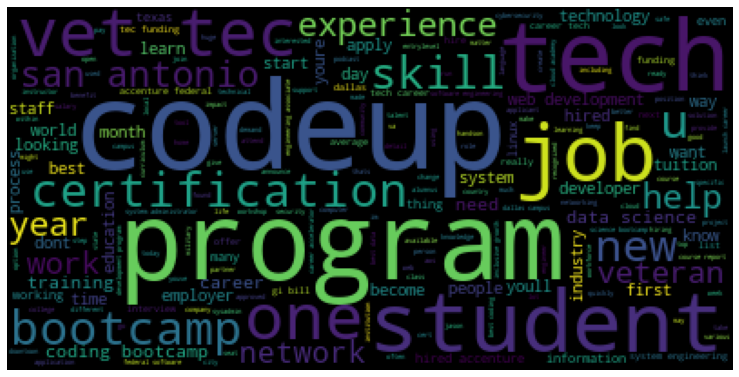

In [45]:
# create wordcloud of most common words
img = WordCloud(background_color='black').generate(all_words)
# display wordcloud image product
plt.imshow(img)
# set axis to off
plt.axis('off')

In [62]:
# create bigrams of all the words and view first 20
bigrams = nltk.ngrams(all_words.split(), 2)
print(list(bigrams)[:20])

[('happy', 'announce'), ('announce', 'vet'), ('vet', 'tec'), ('tec', 'benefit'), ('benefit', 'available'), ('available', 'used'), ('used', 'campus'), ('campus', 'located'), ('located', 'dallas'), ('dallas', 'tx'), ('tx', 'next'), ('next', 'dallas'), ('dallas', 'start'), ('start', 'date'), ('date', 'web'), ('web', 'development'), ('development', 'program'), ('program', 'january'), ('january', '31st'), ('31st', '2022')]


In [69]:
# use value counts to see the top 20 bigrams in codeup blogs
top_20_codeup_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_codeup_bigrams.head()

(vet, tec)            30
(san, antonio)        23
(data, science)       18
(web, development)    17
(coding, bootcamp)    11
dtype: int64

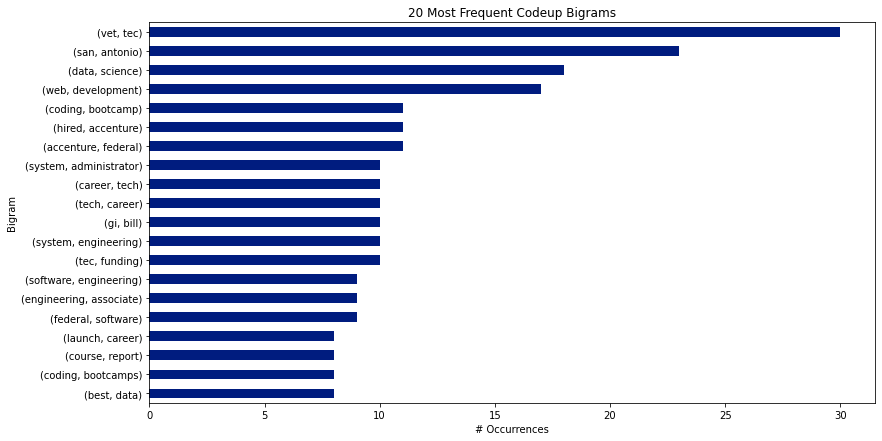

In [72]:
# plot out top 20 codeup blog bigrams
top_20_codeup_bigrams.sort_values().plot.barh()

plt.title('20 Most Frequent Codeup Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

## Takeaways

Vet Tec & San Antonio are the most common bigrams for Codeup blogs which is not that surprising considering two of the campuses are located in San Antonio and Vet Tec is used by a lot of the students to fund their course. It looks like data science is discussed a little more than Web Development which could be because it's newer and being promoted. 

# Exercise 3

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [17]:
# pull in the data
news_df = prepare.prep_clean_news_data()
news_df.head()

,title,original,category,clean,stemmed,lemmatized
0,RBI cancels licence of Maha-based Independence...,RBI has cancelled licence of Maharashtra-based...,business,rbi cancelled licence maharashtrabased indepen...,rbi cancel licenc maharashtrabas independ coop...,rbi cancelled licence maharashtrabased indepen...
1,Boost to EVs a big step: Windmill Capital,"Increased use of EVs in public transport, spec...",business,increased use evs public transport special mob...,increas use ev public transport special mobil ...,increased use ev public transport special mobi...
2,Facebook parent Meta's $230-billion wipeout bi...,Facebook's parent Meta's shares plunged 27% an...,business,facebook ' s parent meta ' s shares plunged 27...,facebook ' s parent meta ' s share plung 27 th...,facebook ' s parent meta ' s share plunged 27 ...
3,"Tesla co-worker used N-word, threw a hot tool ...",A former Tesla worker has filed a lawsuit agai...,business,former tesla worker filed lawsuit company fail...,former tesla worker file lawsuit compani fail ...,former tesla worker filed lawsuit company fail...
4,Mark Zuckerberg loses $31 bn in one of the big...,Meta CEO Mark Zuckerberg's wealth dropped by $...,business,meta ceo mark zuckerberg ' s wealth dropped 31...,meta ceo mark zuckerberg ' s wealth drop 31 bi...,meta ceo mark zuckerberg ' s wealth dropped 31...


In [18]:
# check number and percent by category (all equal since we selected the same amount from each page)
categories = pd.concat([news_df.category.value_counts(),
                    news_df.category.value_counts(normalize=True)], axis=1)
categories.columns = ['n', 'percent']
categories

,n,percent
entertainment,25,0.25
business,25,0.25
technology,25,0.25
sports,25,0.25


In [46]:
# combine all lemmatized words by category
entertainment_words = ' '.join(news_df.lemmatized[news_df.category == 'entertainment'].astype(str))
business_words = ' '.join(news_df.lemmatized[news_df.category == 'business'].astype(str))
technology_words = ' '.join(news_df.lemmatized[news_df.category == 'technology'].astype(str))
sports_words = ' '.join(news_df.lemmatized[news_df.category == 'sports'].astype(str))
all_words = ' '.join(news_df.lemmatized)

In [47]:
# calculate word frequency by category
entertainment_words_freq = pd.Series(entertainment_words.split()).value_counts()
business_words_freq = pd.Series(business_words.split()).value_counts()
technology_words_freq = pd.Series(technology_words.split()).value_counts()
sports_words_freq = pd.Series(sports_words.split()).value_counts()
all_words_freq = pd.Series(all_words.split()).value_counts()

In [21]:
# check top entertainment word frequencies
entertainment_words_freq.head(10)

'          57
said       16
added      14
actor      13
s          12
film       11
actress    11
wrote       7
asked       6
bos         5
dtype: int64

In [23]:
# check top business word frequencies
business_words_freq.head(10)

'           42
s           31
said        21
company     13
billion     11
facebook     8
added        7
fell         7
meta         6
india        6
dtype: int64

In [24]:
# check top technology word frequencies
technology_words_freq.head(10)

'           43
s           34
billion     20
said        15
facebook    11
meta        10
fell         9
u            8
revenue      8
user         7
dtype: int64

In [25]:
# check top sports word frequencies
sports_words_freq.head(10)

'           21
said        18
added       14
team        11
s           11
world        8
india        8
auction      6
positive     6
coach        6
dtype: int64

In [30]:
# check top all word frequencies
all_words_freq.head(20)

'           163
s            88
said         70
added        37
billion      31
company      20
facebook     19
meta         16
time         16
fell         16
india        15
also         15
revenue      14
actor        13
one          12
u            12
thursday     12
share        12
team         12
film         11
dtype: int64

In [37]:
# concat word frequencies for all categories and view
word_counts = (pd.concat([all_words_freq, entertainment_words_freq, business_words_freq, technology_words_freq, sports_words_freq], axis=1, sort=True)
                .set_axis(['all', 'entertainment', 'business', 'technology', 'sports'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,entertainment,business,technology,sports
',163,57,42,43,21
10,5,0,2,3,0
100,3,1,2,0,0
1000,2,0,1,1,0
107,1,0,0,1,0


Text(0.5, 1.0, 'Proportion by category for the 20 most common words')

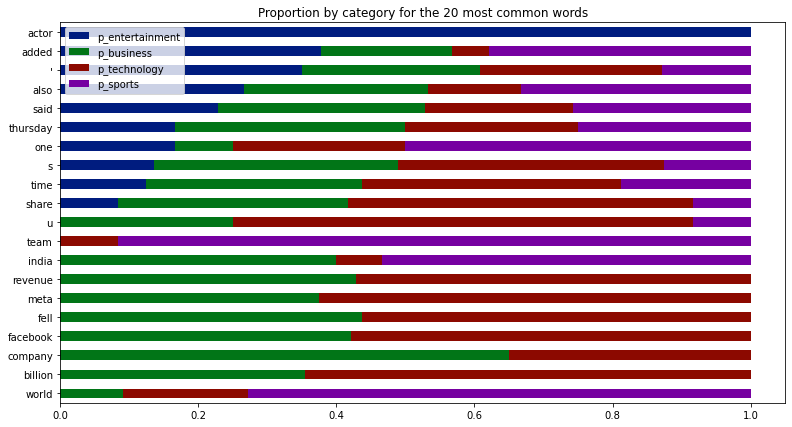

In [39]:
# plot the percentage by category
(word_counts
 .assign(p_entertainment=word_counts.entertainment / word_counts['all'],
         p_business=word_counts.business / word_counts['all'],
         p_technology=word_counts.technology / word_counts['all'],
         p_sports=word_counts.sports / word_counts['all'])
 .sort_values(by='all')
 [['p_entertainment', 'p_business', 'p_technology', 'p_sports']]
 .tail(20)
 .sort_values('p_entertainment')
 .plot.barh(stacked=True))

plt.title('Proportion by category for the 20 most common words')

In [54]:
# create wordcloud function
def create_wordcloud(str):
    img = WordCloud(background_color='black').generate(str)
    # display wordcloud image product
    plt.imshow(img)
    # set axis to off
    plt.axis('off')
    plt.show()

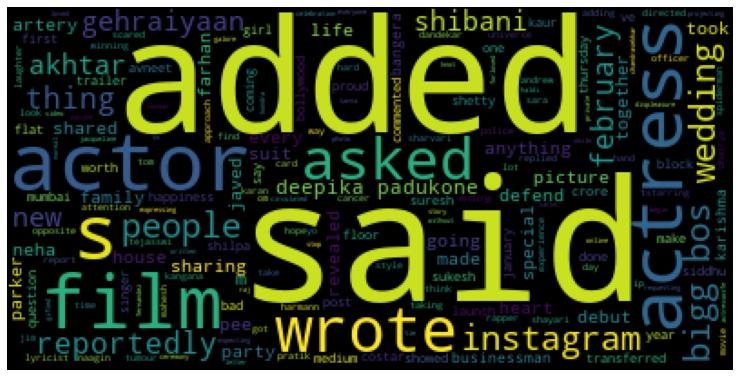

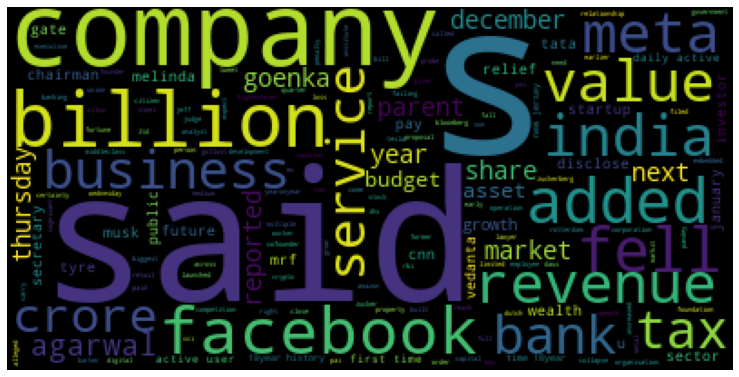

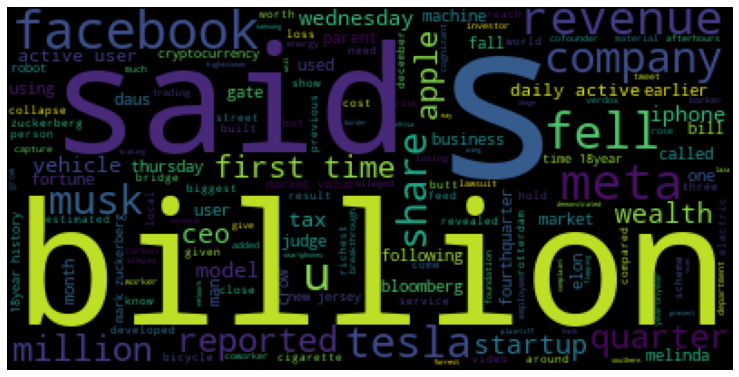

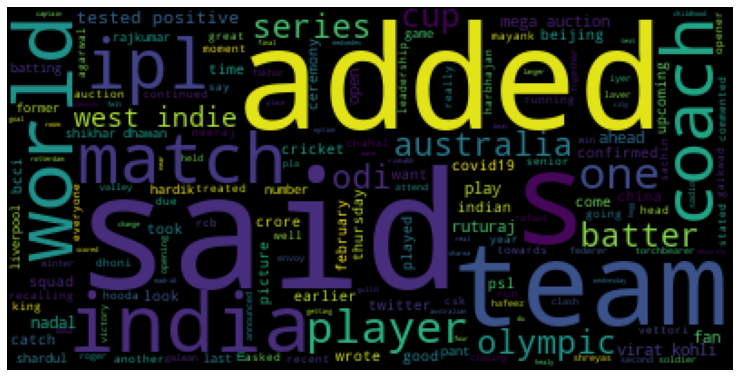

In [55]:
# use function to view wordclouds for all categories
cats = [entertainment_words, business_words, technology_words, sports_words]

for str in cats:
    create_wordcloud(str)

In [61]:
# create bigrams for each category
for str in cats:
    bigrams = nltk.ngrams(str.split(), 2)
    print(list(bigrams)[:20])

[('picture', 'tv'), ('tv', 'actress'), ('actress', 'karishma'), ('karishma', 'tanna'), ('tanna', 'businessman'), ('businessman', 'varun'), ('varun', 'bangera'), ('bangera', "'"), ("'", 's'), ('s', 'haldi'), ('haldi', 'ceremony'), ('ceremony', 'shared'), ('shared', 'online'), ('online', 'actress'), ('actress', 'reportedly'), ('reportedly', 'tie'), ('tie', 'knot'), ('knot', 'bangera'), ('bangera', 'february'), ('february', '5')]
[('rbi', 'cancelled'), ('cancelled', 'licence'), ('licence', 'maharashtrabased'), ('maharashtrabased', 'independence'), ('independence', 'cooperative'), ('cooperative', 'bank'), ('bank', 'citing'), ('citing', 'inadequate'), ('inadequate', 'capital'), ('capital', 'cease'), ('cease', 'carry'), ('carry', 'banking'), ('banking', 'operation'), ('operation', 'close'), ('close', 'business'), ('business', 'february'), ('february', '3'), ('3', 'present'), ('present', 'situation'), ('situation', 'bank')]
[('facebook', "'"), ("'", 's'), ('s', 'parent'), ('parent', 'meta'), 

In [74]:
# check top 20 bigrams for entertainment
top_20_entertainment_bigrams = (pd.Series(nltk.ngrams(entertainment_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_entertainment_bigrams

(', s)                 12
(bigg, bos)             5
(', gehraiyaan)         4
(deepika, padukone)     4
(gehraiyaan, ')         4
(bos, 15)               3
(film, ')               3
(', m)                  3
(added, actor)          3
(i, ')                  3
(', t)                  2
(actress, deepika)      2
(', said)               2
(', naagin)             2
(naagin, ')             2
(', bigg)               2
(film, added)           2
(can, ')                2
(took, instagram)       2
(added, actress)        2
dtype: int64

In [75]:
# check top 20 bigrams for business
top_20_business_bigrams = (pd.Series(nltk.ngrams(business_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_business_bigrams

(', s)                    31
(s, share)                 4
(meta, ')                  4
(facebook, ')              4
(market, value)            3
(time, 18year)             3
(share, fell)              3
(18year, history)          3
(first, time)              3
(new, jersey)              3
(daily, active)            3
(active, user)             3
(company, ')               3
(vedanta, limited)         2
(zuckerberg, ')            2
(billion, highestever)     2
(s, parent)                2
(history, facebook)        2
(cofounder, bill)          2
(india, ')                 2
dtype: int64

In [76]:
# check top 20 bigrams for technology
top_20_technology_bigrams = (pd.Series(nltk.ngrams(technology_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_technology_bigrams

(', s)                   34
(s, share)                5
(meta, ')                 5
(facebook, ')             5
(first, time)             5
(daily, active)           4
(active, user)            4
(company, ')              3
(new, jersey)             3
(time, 18year)            3
(market, value)           3
(fell, 20)                3
(share, fell)             3
(18year, history)         3
(mark, zuckerberg)        3
(apple, ')                3
(southern, border)        2
(afterhours, trading)     2
(s, parent)               2
(three, month)            2
dtype: int64

In [77]:
# check top 20 bigrams for sports
top_20_sports_bigrams = (pd.Series(nltk.ngrams(sports_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_sports_bigrams

(', s)                11
(west, indie)          5
(tested, positive)     5
(mega, auction)        4
(virat, kohli)         4
(shikhar, dhawan)      3
(kohli, ')             3
(ipl, mega)            3
(also, tested)         3
(series, west)         3
(bcci, confirmed)      2
(mayank, agarwal)      2
(rafael, nadal)        2
(sharma, said)         2
(senior, player)       2
(pla, soldier)         2
(envoy, attend)        2
(childhood, coach)     2
(real, madrid)         2
(winter, olympics)     2
dtype: int64

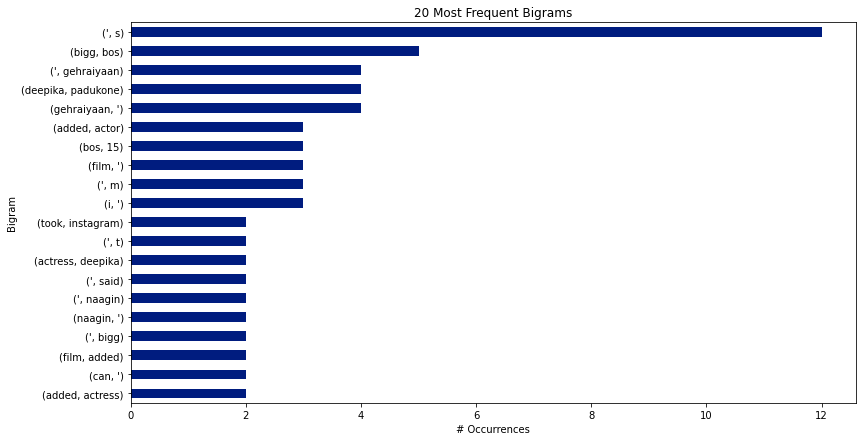

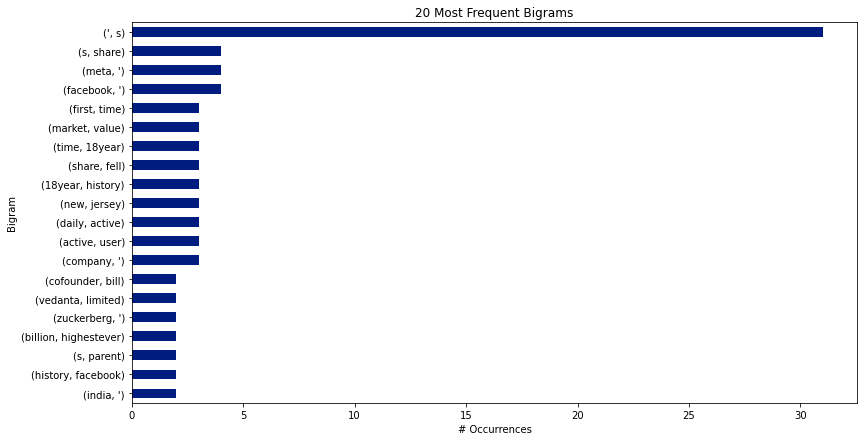

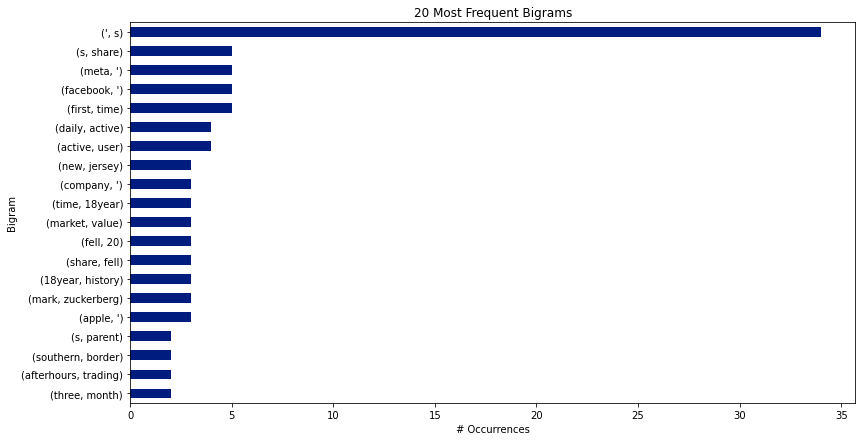

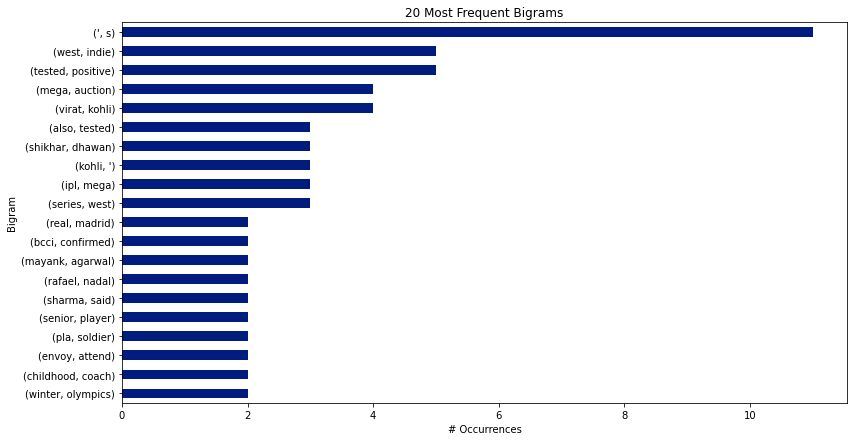

In [73]:
# plot 20 most frequent bigrams by category
bigrams = [top_20_entertainment_bigrams, top_20_business_bigrams, top_20_technology_bigrams, top_20_sports_bigrams]

for cat in bigrams:
    cat.sort_values().plot.barh()

    plt.title('20 Most Frequent Bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurrences')
    ticks, _ = plt.yticks()
    plt.show()